In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import Region 
SelectShapeStd = Region.SelectShapeStd
def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# Contour Extractuion 

1. Circularity 
2. Moment of Contour (m20,m02,m11)
3. Anisometry of Contour
4. Smallest Rotate Rectangle
5. Smallest Rectangle
6. Select Contour based on Contour Features 


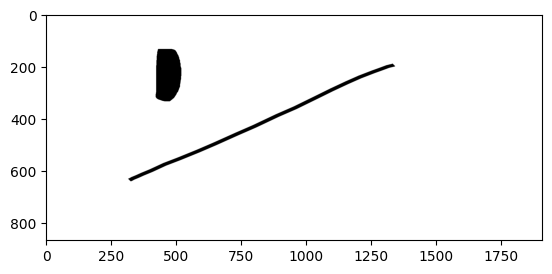

In [2]:
img  = cv2.imread("../images/line.png")
gray = cv2.imread("../images/line.png",0)
show(gray)

index:1
number contour: 1


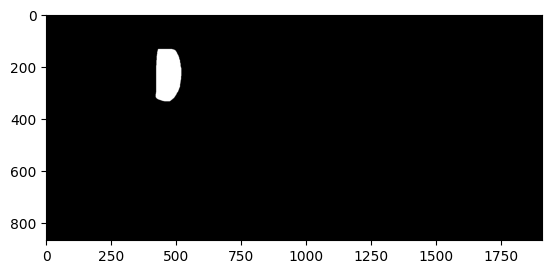

In [3]:
_, threshold  = cv2.threshold(gray,10, 255 , cv2.THRESH_BINARY_INV)

threshold = SelectShapeStd(threshold,mode ="area" )
contours , _  =cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(f'number contour: {len(contours)}')
show(threshold)

# Circulatiry

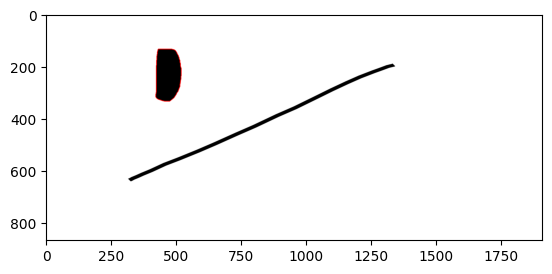

In [4]:
img_copy  = img.copy() 
cv2.drawContours(img_copy, contours[0], -1, (0,0,255) ,2)
showC(img_copy)

### Area inside contour

In [5]:
area = cv2.contourArea(contours[0])
print(f':Area {area}')

moment = cv2.moments(contours[0])
print(type(moment))
center_x = moment['m10'] / moment['m00']
center_y = moment['m01'] / moment['m00']
print(moment['m01'])

:Area 16925.0
<class 'dict'>
3924424.5


In [6]:
print(moment['m02'])
print(moment['m20'])


959041961.3333333
3723570905.5


In [7]:
dis = []
for point in contours[0]: 
    x_codinate = point[0][0]
    y_codinate = point[0][1]
    d = math.sqrt((x_codinate - center_x)**2 + (center_y - y_codinate)**2)
    dis.append(d)
        
max_dis = max(dis)
cicularity  = area / (math.pi * max_dis**2)
print(math.pi * max_dis**2)
print(cicularity)

34243.78035398652
0.49425033758078235



# Moments of Contour

$$m_{i,j} = \Sigma_{x,y}{(x-center_x)^i *(y-center_y)^j}$$

# Anisometry of Contours
*  Moments of Contour

1. m20 moment bac 2 cua toa do x
2. m02 moment bac 2 cua toa do y
3. m11 momnet bac 1 cua toa do x, y

* Calculate R_a and R_b

---
* R_a, R_b chiều dài và chiều rộng của hình ellipse nhỏ nhất bao quanh đối tượng

$$R_a = \frac{\sqrt{8*(M_{20} + M_{02} +\sqrt{(M_{20} - M_{02})^2+4*M_{11}^2 }})}{2}$$
$$$$


$$R_b = \frac{\sqrt{8*(M_{20} + M_{02} - \sqrt{(M_{20} - M_{02})^2+4*M_{11}^2 }})}{2}$$
$$$$


$$Anisometry = \frac {R_a}{R_b}$$

$$ϕ = -0.5 * atan2(2*M_{11},M_{02} - M_{20})$$

In [8]:
def calc_moment(contours):
    m20 =0 
    m02 = 0 
    m11 = 0 
    
    for point in contours: 
        x_codinate = point[0][0]
        y_codinate = point[0][1]
        
        m20 += (x_codinate - center_x) **2 
        m02 += (y_codinate - center_y) **2 
        
        m11 = (x_codinate - center_x) * (y_codinate - center_y)
    
    return m20 , m02 , m11

def calc_anisometry (m20 , m02 , m11 ):
    
    R_a = math.sqrt(8* (m20 + m02 + math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2 
    R_b = math.sqrt(8* (m20 + m02 - math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2
    
    return R_a / R_b

m20 , m02 , m11 = calc_moment(contours[0])
anisometry = calc_anisometry(m20 , m02 , m11)
print(anisometry)


1.7289925274766873


# Smallest Rotate Rectangle

# Smallest Rectangle

# Select Contour based on Contour Features 

# Hough Line Transform (Hough Transform)

$$r = y*sin(\alpha)- x*cos(\alpha)$$

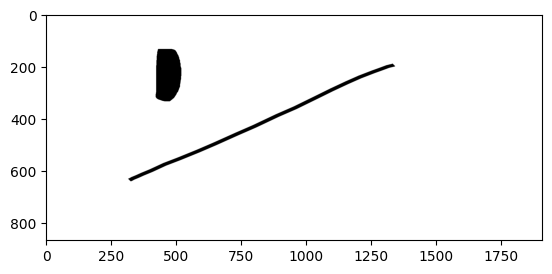

In [9]:
img = cv2.imread("../images/line.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

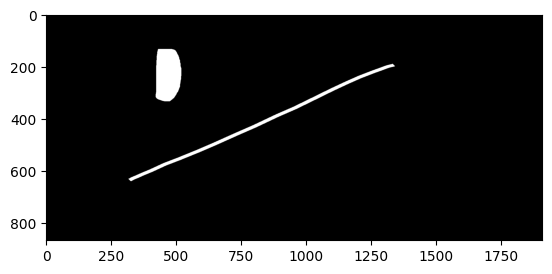

In [10]:
_, threshold  = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
show(threshold)

index:2


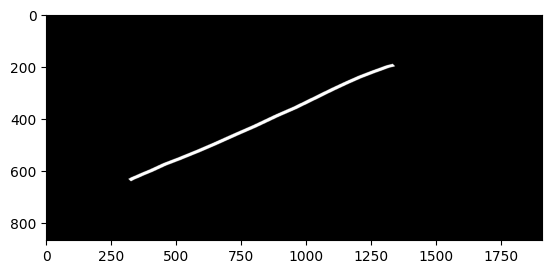

In [11]:

line  = SelectShapeStd(threshold, mode = "width")
show(line)

In [12]:
alpla = np.arange(0, 180, 1)
alpla_radian = np.deg2rad(alpla)
alpla_radian

cos_alpha = np.cos(alpla_radian)
sin_alpha = np.sin(alpla_radian)

print(cos_alpha)
print(sin_alpha)

[ 1.00000000e+00  9.99847695e-01  9.99390827e-01  9.98629535e-01
  9.97564050e-01  9.96194698e-01  9.94521895e-01  9.92546152e-01
  9.90268069e-01  9.87688341e-01  9.84807753e-01  9.81627183e-01
  9.78147601e-01  9.74370065e-01  9.70295726e-01  9.65925826e-01
  9.61261696e-01  9.56304756e-01  9.51056516e-01  9.45518576e-01
  9.39692621e-01  9.33580426e-01  9.27183855e-01  9.20504853e-01
  9.13545458e-01  9.06307787e-01  8.98794046e-01  8.91006524e-01
  8.82947593e-01  8.74619707e-01  8.66025404e-01  8.57167301e-01
  8.48048096e-01  8.38670568e-01  8.29037573e-01  8.19152044e-01
  8.09016994e-01  7.98635510e-01  7.88010754e-01  7.77145961e-01
  7.66044443e-01  7.54709580e-01  7.43144825e-01  7.31353702e-01
  7.19339800e-01  7.07106781e-01  6.94658370e-01  6.81998360e-01
  6.69130606e-01  6.56059029e-01  6.42787610e-01  6.29320391e-01
  6.15661475e-01  6.01815023e-01  5.87785252e-01  5.73576436e-01
  5.59192903e-01  5.44639035e-01  5.29919264e-01  5.15038075e-01
  5.00000000e-01  4.84809

In [13]:
a = np.arange(0,180,1)
b = np.deg2rad(a)
c = np.cos(b)
c

array([ 1.00000000e+00,  9.99847695e-01,  9.99390827e-01,  9.98629535e-01,
        9.97564050e-01,  9.96194698e-01,  9.94521895e-01,  9.92546152e-01,
        9.90268069e-01,  9.87688341e-01,  9.84807753e-01,  9.81627183e-01,
        9.78147601e-01,  9.74370065e-01,  9.70295726e-01,  9.65925826e-01,
        9.61261696e-01,  9.56304756e-01,  9.51056516e-01,  9.45518576e-01,
        9.39692621e-01,  9.33580426e-01,  9.27183855e-01,  9.20504853e-01,
        9.13545458e-01,  9.06307787e-01,  8.98794046e-01,  8.91006524e-01,
        8.82947593e-01,  8.74619707e-01,  8.66025404e-01,  8.57167301e-01,
        8.48048096e-01,  8.38670568e-01,  8.29037573e-01,  8.19152044e-01,
        8.09016994e-01,  7.98635510e-01,  7.88010754e-01,  7.77145961e-01,
        7.66044443e-01,  7.54709580e-01,  7.43144825e-01,  7.31353702e-01,
        7.19339800e-01,  7.07106781e-01,  6.94658370e-01,  6.81998360e-01,
        6.69130606e-01,  6.56059029e-01,  6.42787610e-01,  6.29320391e-01,
        6.15661475e-01,  

In [25]:
def hough_line_transform (region , str_aplha = 1, step_r = 1, threshold  = 100):
    height, width = region.shape[0] , region.shape[1]
    
    max_r = int(math.sqrt (height**2 + width**2))
    
    number_alpha = int(180 / str_aplha)
    
    alpla = np.arange(0, 180, 1)
    
    alpla_radian = np.deg2rad(alpla)
    
    cos_alpha = np.cos(alpla_radian)
    sin_alpha = np.sin(alpla_radian)
    
    cummulator = np.zeros((max_r, number_alpha))
    
    for y in range(height):
        for x in range(width):
            if region[y, x] ==255:
                for idx_alpha, alpha in enumerate(alpla_radian):
                    r = int(y * sin_alpha[idx_alpha]  - x * cos_alpha[idx_alpha])
                    cummulator[r, idx_alpha] += 1
       

    cummulator_flatten =    cummulator.flatten()
    max_number_point   =    max(cummulator_flatten)
    
    lines = []
    
    r_matrix = np.arange(0,max_r, step_r)
    
    for idx_r , r in enumerate(r_matrix): 
        for idx_a , a in enumerate(alpla_radian): 
            
            if  cummulator[idx_r, idx_a] >= max_number_point - 1:
                
                if (math.sin (a) == 0):
                    continue
                
                x1 = 3000 
                y1 = int(r + x1* math.cos(a)) / math.sin (a)
                
                x2 = -3000 
                y2 = int(r + x2* math.cos(a)) / math.sin (a)
    
                lines.append(((x1,y1),(x2, y2)))
                                   
    return lines, max_number_point, cummulator

In [29]:
# Code from scratch

def hough_line(region, theta_split = 1, r_split = 1, threshold = 100):
    
    max_r = int(np.sqrt(region.shape[0]**2 + region.shape[1]**2))
    
    theta = np.arange(0,180,1)
    rad_theta = np.deg2rad(theta)
    number_theta = int(180/theta_split)

    costheta = np.cos(rad_theta)
    sintheta = np.sin(rad_theta)

    accuml = np.zeros((max_r, number_theta))

    for y in range(region.shape[0]):
        for x in range(region.shape[1]):
            if region[y, x] == 255:
                for index_theta, tt in enumerate(rad_theta):
                    r = int(y * sintheta[index_theta] - x * costheta[index_theta])
                    accuml[r , index_theta] += 1
    

    accuml_flatten = accuml.flatten()    
    max_points = accuml_flatten.max()

    r_matrix = np.arange(0, max_r, r_split)
    print(r_matrix[100])

    for idx_r, r in enumerate(r_matrix):
        for idx_theta, tt in enumerate(rad_theta):

            if accuml[r, idx_theta] >= max_points:

                if(math.sin(tt) == 0):
                    continue
            
                x1 = 3000
                y1 = int(r + x1 * math.cos(tt))/math.sin(tt)

                x2 = -3000
                y2 = int(r + x2 * math.cos(tt))/math.sin(tt)
    lines = []
    lines.append(((x1,y1),(x2, y2)))

    return lines, accuml, max_points


In [30]:
line ,acc, max_point = hough_line(threshold)

100


In [17]:
print(line[0])

((3000, -551.6966843670476), (-3000, 2119.2158351877065))


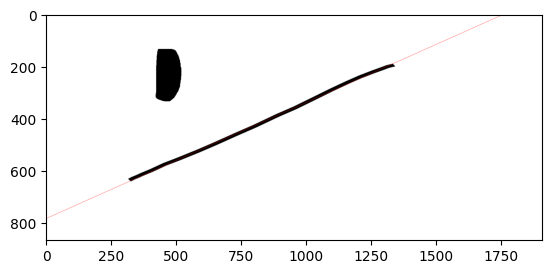

In [18]:
img_copy = img.copy()
for l in line:
    p1 = (int(l[0][0]), int(l[0][1]))
    p2 = (int(l[1][0]), int(l[1][1]))
cv2.line(img_copy,p1, p2,(255,0,0),1)

show(img_copy)

In [19]:
for x, y in enumerate("howkteam"):
    print(f"{x} {y}")
    

0 h
1 o
2 w
3 k
4 t
5 e
6 a
7 m


In [20]:
lines , max_number_point , cummulator= hough_line_transform(threshold)

In [21]:
print(lines)

[((3000, -551.6966843670476), (-3000, 2119.2158351877065))]


1103


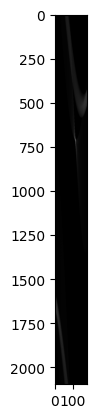

In [22]:
show(cummulator.astype(np.uint16))

max_value = np.max(cummulator.astype(np.uint16))
print(max_value)

In [23]:
print(len(lines))
print(max_number_point)
# for line in lines:
#     print(line[0][0], )
#     print(line[1])

1
1103.0


## Draw Line

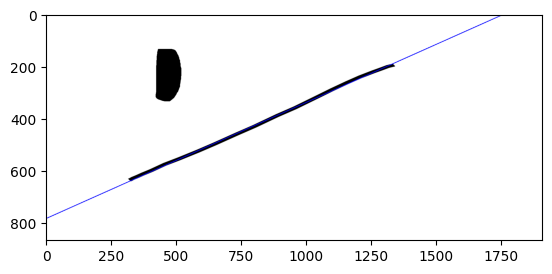

In [24]:
img_copy  = img.copy()
for line in lines:
    point_0  = (int(line[0][0]) , int(line[0][1]))
    point_1  = (int(line[1][0]) , int(line[1][1]))
    cv2.line(img_copy, point_0, point_1, (0,0,255),2)
    
show(img_copy)